In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import pickle

In [3]:
data_dir = '/Users/brandonmcclung/Data/KSC_Weather_Archive/Wind_Towers_Jun_2022/'

In [4]:
files = os.listdir(data_dir)
print(files)


['WeatherTower-b7caeb7c-280a-4125-83b2-5fa4b448f250-202206.dat']


In [5]:
headers = ['DateTime', 'Tower', 'Height', 'AverageMinute', 'AverageWindDirection', 'AverageWindSpeed', 'PeakWindDirection', 'PeakWindSpeed', 'PeakWindDirection10Min', 'PeakWindSpeed10Min', 'Deviation', 'Temperature', 'TemperatureDifference', 'DewPoint', 'RelativeHumidity', 'BarometricPressure']

In [6]:
data = pd.read_csv(data_dir+files[0])
data.columns = headers

The temperature is in Fahrenheit.  Any pressure readings are in millibars.  The heights are in feet.  And the wind speeds are in knots.  Also the wind directions are in degrees. As would be expected.  The deviation parameter is in degrees. 

Make the index the datetime column.  Convert heights to meters. Convert temperature to Kelvin. Covnert windspeed to m/s. 

In [7]:
data.index = data['DateTime']

data['Height_m'] = data['Height']*0.3048

data['Temp_K'] = (data['Temperature']-32.)*5./9.+273.15
data['Temp_C'] = (data['Temperature']-32.)*5./9.

data['DewPoint_K'] = (data['DewPoint']-32.)*5./9.+273.15
data['DewPoint_C'] = (data['DewPoint']-32.)*5./9. 

data['AverageWindSpeed_ms'] = data['AverageWindSpeed']*.514444
data['PeakWindSpeed_ms'] = data['PeakWindSpeed']*.514444
data['PeakWindSpeed10Min_ms'] = data['PeakWindSpeed10Min']*.514444




In [8]:
data

,DateTime,Tower,Height,AverageMinute,AverageWindDirection,AverageWindSpeed,PeakWindDirection,PeakWindSpeed,PeakWindDirection10Min,PeakWindSpeed10Min,...,RelativeHumidity,BarometricPressure,Height_m,Temp_K,Temp_C,DewPoint_K,DewPoint_C,AverageWindSpeed_ms,PeakWindSpeed_ms,PeakWindSpeed10Min_ms
DateTime,,,,,,,,,,,,,,,,,,,,,
06/01/2022 00:00:00,06/01/2022 00:00:00,'0002 NW SE',6,5,NaN,NaN,NaN,NaN,NaN,NaN,...,70.0,NaN,1.8288,298.594444,25.444444,292.705556,19.555556,NaN,NaN,NaN
06/01/2022 00:00:00,06/01/2022 00:00:00,'0002 NW SE',12,5,80.0,4.0,77.0,10.0,77.0,10.0,...,NaN,NaN,3.6576,NaN,NaN,NaN,NaN,2.057776,5.144440,5.144440
06/01/2022 00:00:00,06/01/2022 00:00:00,'0002 NW SE',54,5,78.0,8.0,83.0,13.0,75.0,13.0,...,75.0,NaN,16.4592,297.983333,24.833333,293.261111,20.111111,4.115552,6.687772,6.687772
06/01/2022 00:00:00,06/01/2022 00:00:00,'0002 NW SE',90,5,83.0,8.0,82.0,12.0,80.0,14.0,...,NaN,NaN,27.4320,NaN,NaN,NaN,NaN,4.115552,6.173328,7.202216
06/01/2022 00:00:00,06/01/2022 00:00:00,'0002 NW SE',145,5,0.0,0.0,76.0,3.0,76.0,3.0,...,NaN,NaN,44.1960,NaN,NaN,NaN,NaN,0.000000,1.543332,1.543332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
06/30/2022 23:55:00,06/30/2022 23:55:00,'39 B NW(60ft)',459,5,109.0,1.0,94.0,7.0,114.0,9.0,...,84.0,NaN,139.9032,300.372222,27.222222,297.038889,23.888889,0.514444,3.601108,4.629996
06/30/2022 23:55:00,06/30/2022 23:55:00,'0819',6,5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.8288,NaN,NaN,NaN,NaN,NaN,NaN,NaN
06/30/2022 23:55:00,06/30/2022 23:55:00,'0819',54,5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,16.4592,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Find the non duplicated names in the list.  

In [9]:
station_names = data[~data.duplicated('Tower')]['Tower']
print(len(station_names))
print(station_names)

48
DateTime
06/01/2022 00:00:00      '0002 NW  SE'
06/01/2022 00:00:00             '0022'
06/01/2022 00:00:00      '0313 NE  SW'
06/01/2022 00:00:00             '0412'
06/01/2022 00:00:00             '0512'
06/01/2022 00:00:00             '0108'
06/01/2022 00:00:00             '0421'
06/01/2022 00:00:00             '0506'
06/01/2022 00:00:00          'VAB_IN1'
06/01/2022 00:00:00             '0019'
06/01/2022 00:00:00           'SLC 41'
06/01/2022 00:00:00             '0300'
06/01/2022 00:00:00             '0311'
06/01/2022 00:00:00             '1012'
06/01/2022 00:00:00      '0006 NW  SE'
06/01/2022 00:00:00    '39 A SE(60ft)'
06/01/2022 00:00:00             '0805'
06/01/2022 00:00:00             '1000'
06/01/2022 00:00:00             '9404'
06/01/2022 00:00:00      '0313 SW  SW'
06/01/2022 00:00:00           'SLC 40'
06/01/2022 00:00:00             '0303'
06/01/2022 00:00:00             '0714'
06/01/2022 00:00:00             '1204'
06/01/2022 00:00:00      '0006 SE  SE'
06/01/2022 00

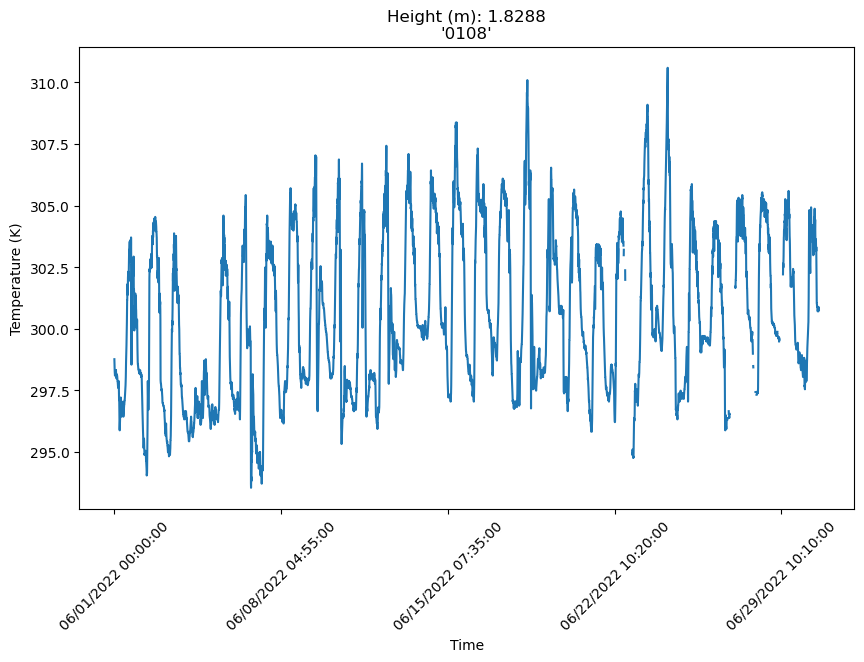

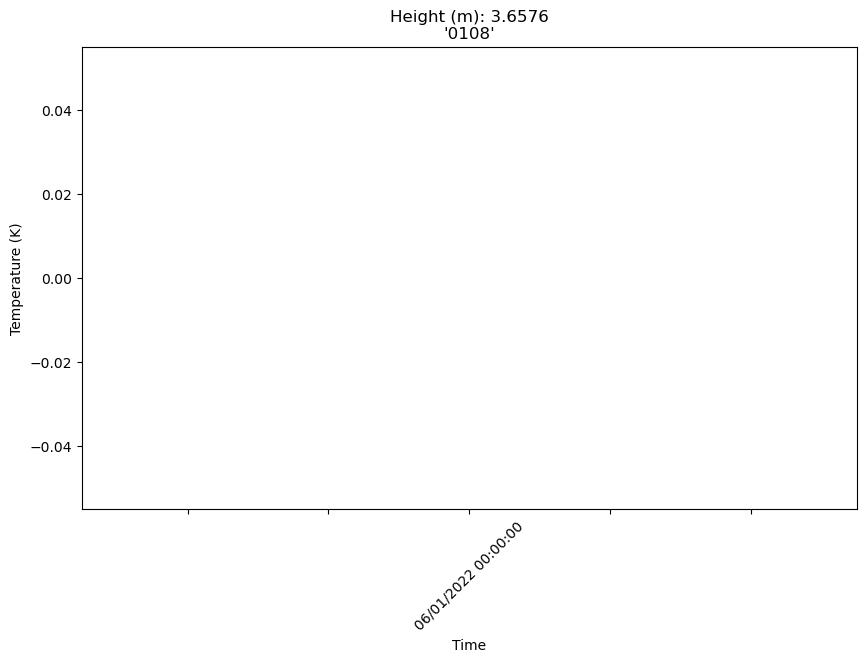

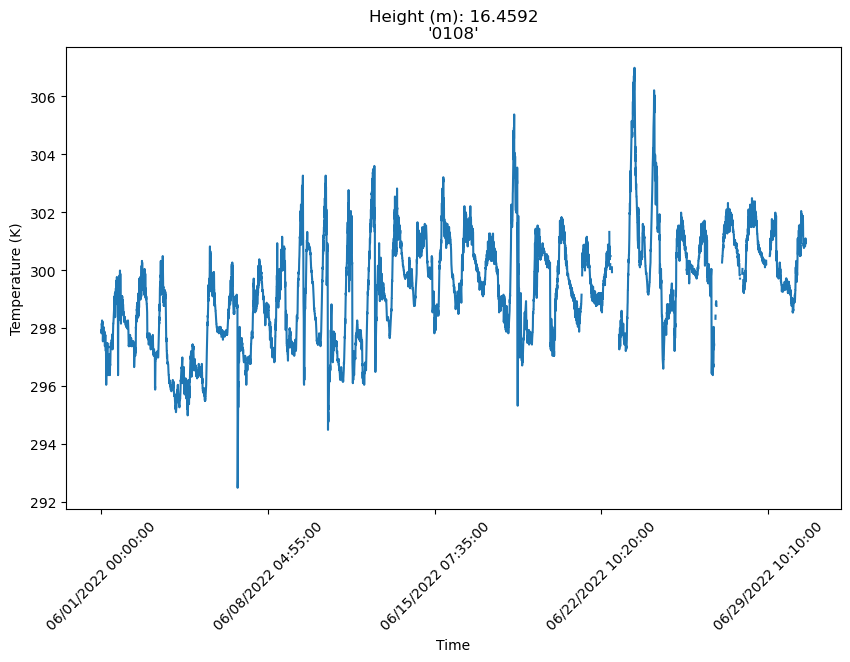

In [65]:
twr = station_names[5]
twr_data = data.loc[data['Tower'] == twr]
twr_hgts = twr_data[~twr_data.duplicated('Height_m')]['Height_m']
for hgt in twr_hgts:
    hgt_data = twr_data.loc[twr_data['Height_m']==hgt]
    plt.figure(figsize=(10,6))
    ax = hgt_data['Temp_K'].plot(rot=45)
    plt.title('Height (m): '+"{:6.4f}".format(hgt)+"\n"+twr)
    plt.ylabel('Temperature (K)')
    plt.xlabel('Time')
    for label in ax.get_xticklabels()[::288]:
        label.set_visible(False)
    plt.savefig('June_2022_Images_Temp/'+'hgt_m_'+"{:6.4f}".format(hgt)+"_"+twr+'.png')

## Questions for KSC

1.  What is the deviation parameter measuring?  Is it the deviation between the different heights or is it a temporal deviation for each wind sensor on each height?
2.  What is the temperature difference measuring?  
3.  What do the directions mean in the station name? 